In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import MaxPooling2D, Dropout, Flatten, Dense, Activation, GRU, SimpleRNN
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Embedding, LSTM, Bidirectional
from tensorflow.keras.datasets import imdb
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
MAX_WORDS=1000
MAX_LEN=200

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

In [4]:
x_train[3][:19] # data is encoded yet 

[1, 4, 2, 2, 33, 2, 4, 2, 432, 111, 153, 103, 4, 2, 13, 70, 131, 67, 11]

In [5]:
y_train[3] # class - positive

1

### Decoding text

In this data frequency encoding is used. Download the dictionary that is used for encoding.

In [6]:
word_index = imdb.get_word_index()

In [7]:
word_index['film'] 

19

In [8]:
# change dictionary that from number to get word 
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

In [9]:
for i in range(1, 21):
    print(i, '->', reverse_word_index[i])

1 -> the
2 -> and
3 -> a
4 -> of
5 -> to
6 -> is
7 -> br
8 -> in
9 -> it
10 -> i
11 -> this
12 -> that
13 -> was
14 -> as
15 -> for
16 -> with
17 -> movie
18 -> but
19 -> film
20 -> on


Decoding text <br>

For this dataset next service codes are used: <br>
0 - placeholder<br>
1 - start of sequence<br>
2 - unknown word<br>

In [10]:
index = 3 # example of review
message = ''
for code in x_train[index]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? the ? ? at ? the ? sort many years after the ? i can still see in my ? eye an ? lady my ? mother ? the battle of ? she makes the characters come ? her ? is that of an eye ? one to the events on the ? ? a ? or so from where she lives br br of course it happened many years before she was ? but you wouldn't guess from the way she tells it the same story is told in ? the ? and ? of ? as i ? it with a friend one night in ? a local cut in to give his version the ? ? to ? time br br stories ? down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our ? world and as we ? older they maybe still ? as ? or as an emotional ? fact and ? ? with ? role ? ? stories ? ? and mystery br br my name is ? like my ? and his ? before him our ? ? himself to us and also ? the story that ? back through ? it ? stories within stories stories that ? the ? wonder of ? its ? ? ? in ? the stuff of ? yet ? is ? in reality this is what gives it i

In [11]:
y_train[index]

1

### Preparing data

In [12]:
x_train = pad_sequences(x_train, maxlen=MAX_LEN, padding='post')
x_test = pad_sequences(x_test, maxlen=MAX_LEN, padding='post')

In [13]:
x_train[3]

array([  4, 341,   7,  27, 846,  10,  10,  29,   9,   2,   8,  97,   6,
       236,   2,   2,   8,   4,   2,   7,  31,   7,   2,  91,   2,   2,
        70,   4, 882,  30, 579,  42,   9,  12,  32,  11, 537,  10,  10,
        11,  14,  65,  44, 537,  75,   2,   2,   2,   2,   2,   4,   2,
         7, 154,   5,   4, 518,  53,   2,   2,   7,   2, 882,  11, 399,
        38,  75, 257,   2,  19,   2,  17,  29, 456,   4,  65,   7,  27,
       205, 113,  10,  10,   2,   4,   2,   2,   9, 242,   4,  91,   2,
         2,   5,   2, 307,  22,   7,   2, 126,  93,  40,   2,  13, 188,
         2,   2,  19,   4,   2,   7,   2, 537,  23,  53, 537,  21,  82,
        40,   2,  13,   2,  14, 280,  13, 219,   4,   2, 431, 758, 859,
         4, 953,   2,   2,   7,   2,   5,  94,  40,  25, 238,  60,   2,
         4,   2, 804,   2,   7,   4,   2, 132,   8,  67,   6,  22,  15,
         9, 283,   8,   2,  14,  31,   9, 242, 955,  48,  25, 279,   2,
        23,  12,   2, 195,  25, 238,  60, 796,   2,   4, 671,   

### Modeling

In [14]:
model_simple = Sequential([
    Embedding(MAX_WORDS, 2, input_length=MAX_LEN),
    #SimpleRNN(128),  is this layer used? if yes, how and where?
    Dropout(0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [15]:
model_simple.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [16]:
history_simple = model_simple.fit(x_train,
                                  y_train,
                                  epochs=20,
                                  batch_size=128, 
                                  validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 1s 4ms/step - loss: 0.6907 - accuracy: 0.5320 - val_loss: 0.6803 - val_accuracy: 0.6056
Epoch 2/20
176/176 [==============================] - 1s 3ms/step - loss: 0.6299 - accuracy: 0.6886 - val_loss: 0.5601 - val_accuracy: 0.7548
Epoch 3/20
176/176 [==============================] - 1s 3ms/step - loss: 0.4976 - accuracy: 0.7870 - val_loss: 0.4476 - val_accuracy: 0.8228
Epoch 4/20
176/176 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.8240 - val_loss: 0.4029 - val_accuracy: 0.8348
Epoch 5/20
176/176 [==============================] - 1s 3ms/step - loss: 0.3805 - accuracy: 0.8392 - val_loss: 0.3843 - val_accuracy: 0.8324
Epoch 6/20
176/176 [==============================] - 1s 3ms/step - loss: 0.3605 - accuracy: 0.8466 - val_loss: 0.3721 - val_accuracy: 0.8392
Epoch 7/20
176/176 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8516 - val_loss: 0.3646 - val_accuracy: 0.8436
Epoch 

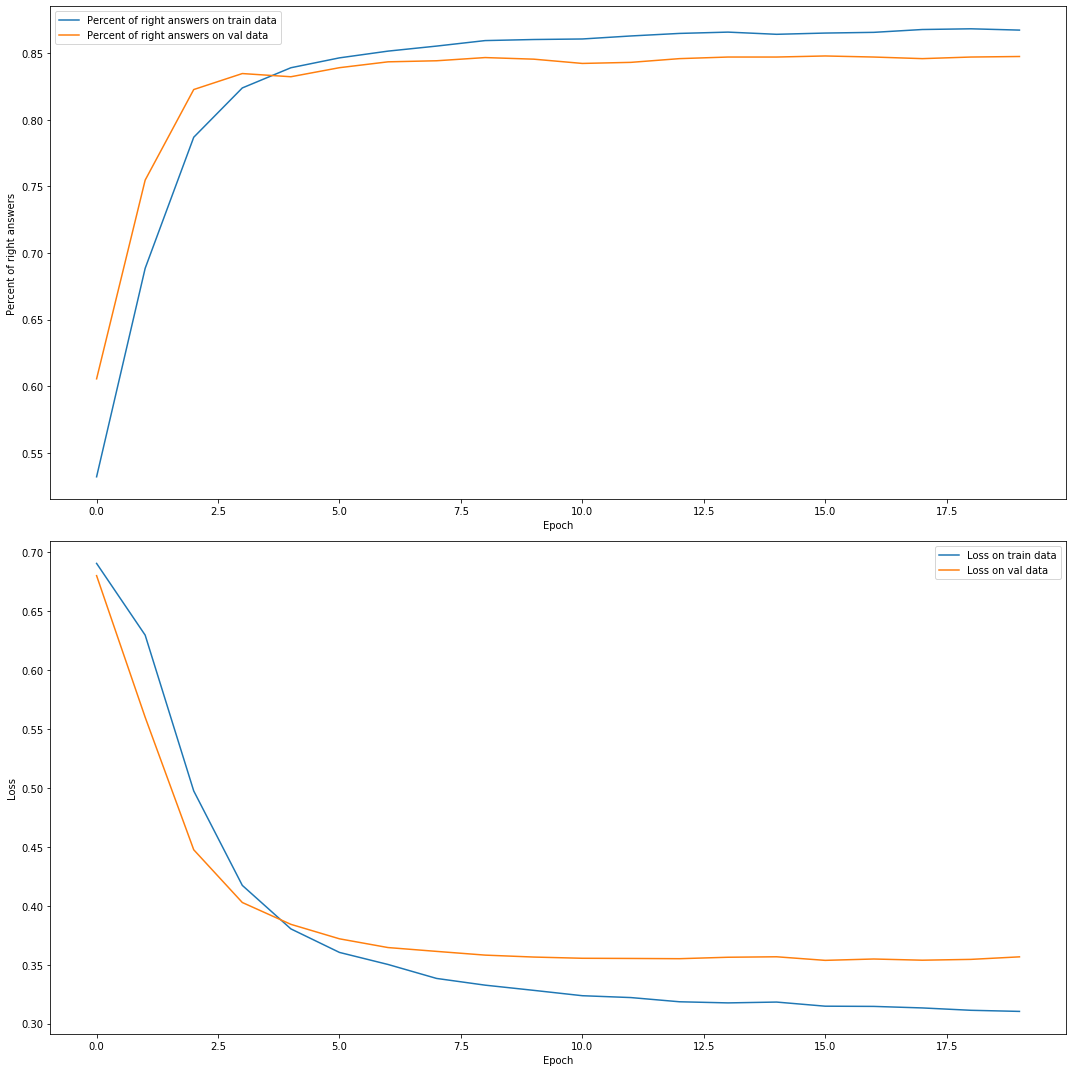

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

ax1.plot(history_simple.history['accuracy'], label='Percent of right answers on train data')
ax1.plot(history_simple.history['val_accuracy'], label='Percent of right answers on val data')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Percent of right answers')
ax1.legend()

ax2.plot(history_simple.history['loss'], label='Loss on train data')
ax2.plot(history_simple.history['val_loss'], label='Loss on val data')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

### Modeling LSTM

In [18]:
model_LSTM = Sequential([
    Embedding(MAX_WORDS, 2, input_length=MAX_LEN),
    LSTM(128),
    Dropout(0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [19]:
model_LSTM.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [20]:
history_LSTM = model_LSTM.fit(x_train,
                              y_train,
                              epochs=20,
                              batch_size=128,
                              validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 83s 474ms/step - loss: 0.6928 - accuracy: 0.5275 - val_loss: 0.6904 - val_accuracy: 0.5652
Epoch 2/20
176/176 [==============================] - 83s 472ms/step - loss: 0.6912 - accuracy: 0.5373 - val_loss: 0.6894 - val_accuracy: 0.5068
Epoch 3/20
176/176 [==============================] - 82s 468ms/step - loss: 0.6804 - accuracy: 0.5474 - val_loss: 0.6786 - val_accuracy: 0.5548
Epoch 4/20
176/176 [==============================] - 84s 476ms/step - loss: 0.6707 - accuracy: 0.5733 - val_loss: 0.6697 - val_accuracy: 0.5532
Epoch 5/20
176/176 [==============================] - 83s 469ms/step - loss: 0.6600 - accuracy: 0.5815 - val_loss: 0.6591 - val_accuracy: 0.5576
Epoch 6/20
176/176 [==============================] - 83s 471ms/step - loss: 0.6584 - accuracy: 0.5917 - val_loss: 0.6739 - val_accuracy: 0.5464
Epoch 7/20
176/176 [==============================] - 84s 476ms/step - loss: 0.6384 - accuracy: 0.6078 - val_loss: 0.5780 - val_ac

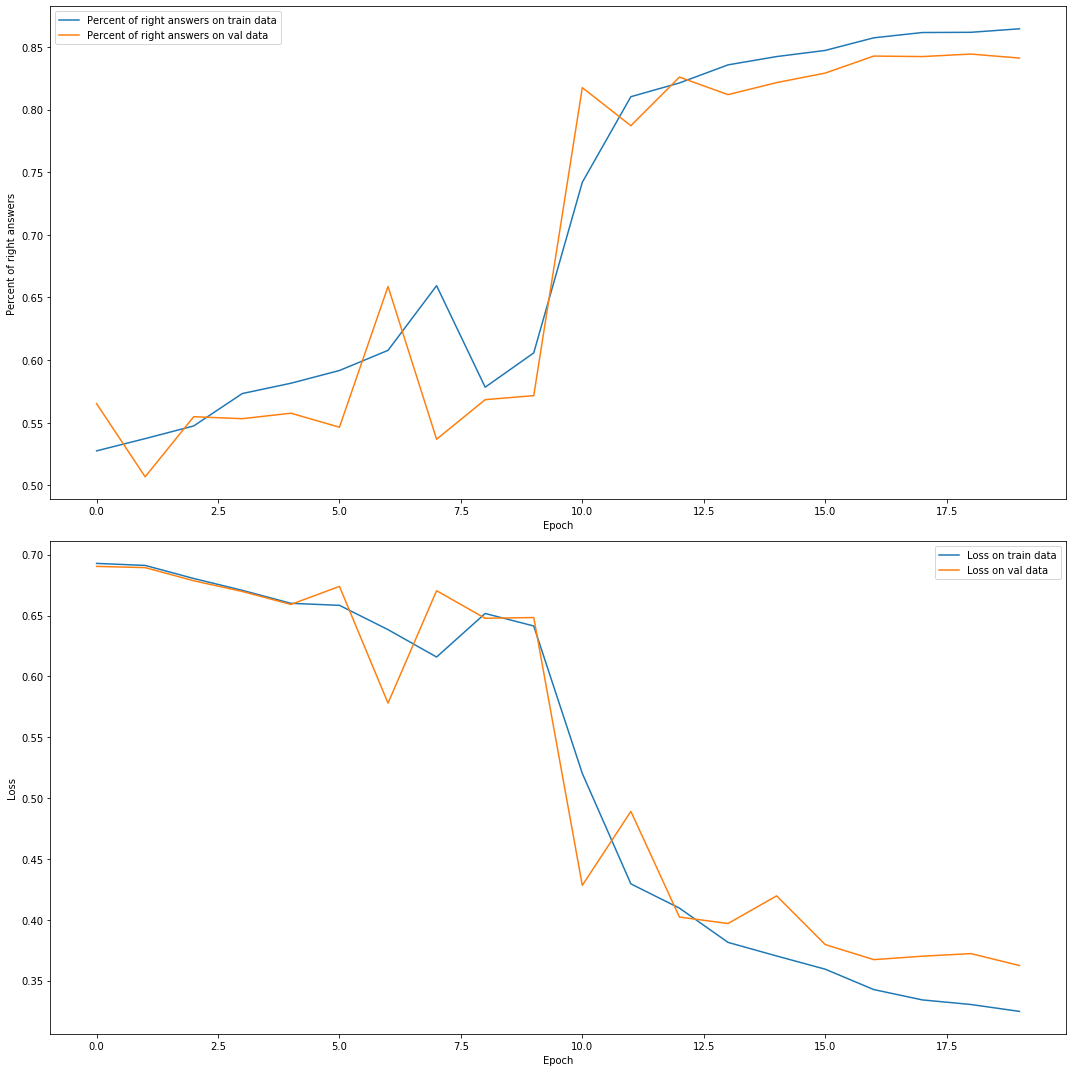

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

ax1.plot(history_LSTM.history['accuracy'], label='Percent of right answers on train data')
ax1.plot(history_LSTM.history['val_accuracy'], label='Percent of right answers on val data')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Percent of right answers')
ax1.legend()

ax2.plot(history_LSTM.history['loss'], label='Loss on train data')
ax2.plot(history_LSTM.history['val_loss'], label='Loss on val data')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [22]:
scores_LSTM = model_LSTM.evaluate(x_test, y_test)

782/782 [==============================] - 49s 63ms/step - loss: 0.3437 - accuracy: 0.8496


### Modeling GRU

In [23]:
model_GRU = Sequential([
    Embedding(MAX_WORDS, 2, input_length=MAX_LEN),
    GRU(128),
    Dropout(0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [24]:
model_GRU.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [25]:
history_GRU = model_GRU.fit(x_train,
                            y_train,
                            epochs=20,
                            batch_size=128,
                            validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 69s 391ms/step - loss: 0.6928 - accuracy: 0.5062 - val_loss: 0.6878 - val_accuracy: 0.5400
Epoch 2/20
176/176 [==============================] - 73s 415ms/step - loss: 0.6809 - accuracy: 0.5527 - val_loss: 0.6630 - val_accuracy: 0.5644
Epoch 3/20
176/176 [==============================] - 71s 405ms/step - loss: 0.6484 - accuracy: 0.5840 - val_loss: 0.6498 - val_accuracy: 0.5860
Epoch 4/20
176/176 [==============================] - 70s 398ms/step - loss: 0.5061 - accuracy: 0.7664 - val_loss: 0.4771 - val_accuracy: 0.7852
Epoch 5/20
176/176 [==============================] - 70s 399ms/step - loss: 0.4131 - accuracy: 0.8297 - val_loss: 0.4103 - val_accuracy: 0.8264
Epoch 6/20
176/176 [==============================] - 71s 405ms/step - loss: 0.3714 - accuracy: 0.8475 - val_loss: 0.3925 - val_accuracy: 0.8332
Epoch 7/20
176/176 [==============================] - 71s 401ms/step - loss: 0.3463 - accuracy: 0.8589 - val_loss: 0.3959 - val_ac

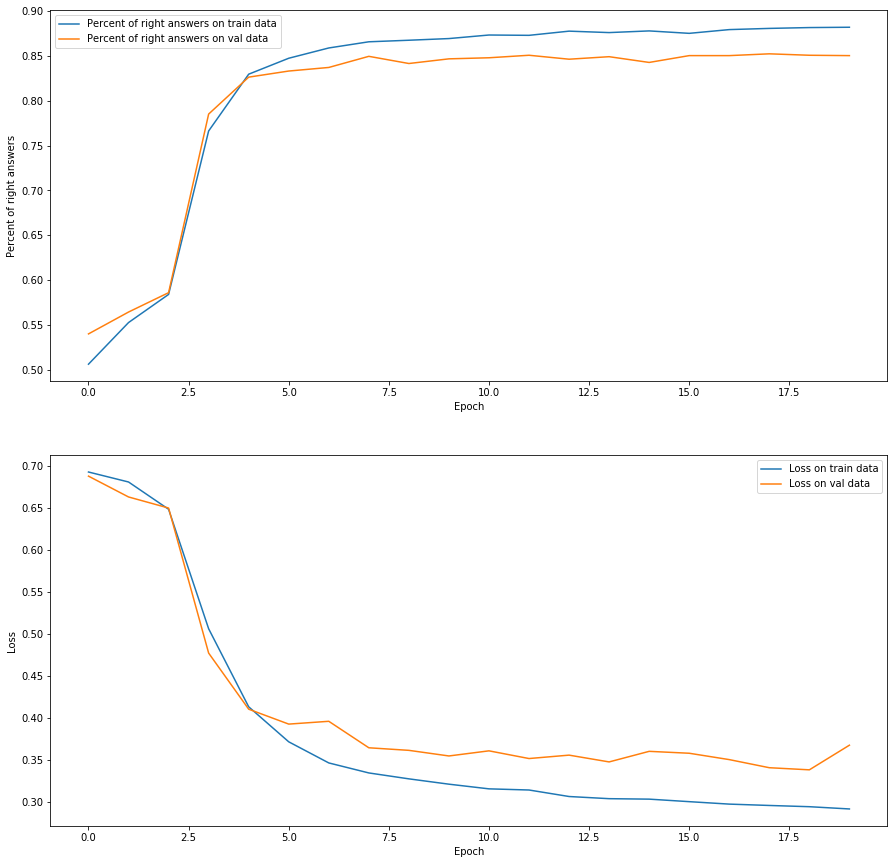

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

ax1.plot(history_GRU.history['accuracy'], label='Percent of right answers on train data')
ax1.plot(history_GRU.history['val_accuracy'], label='Percent of right answers on val data')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Percent of right answers')
ax1.legend()

ax2.plot(history_GRU.history['loss'], label='Loss on train data')
ax2.plot(history_GRU.history['val_loss'], label='Loss on val data')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

In [27]:
scores_GRU = model_GRU.evaluate(x_test, y_test)

782/782 [==============================] - 27s 35ms/step - loss: 0.3473 - accuracy: 0.8594


### Bidirectinal LSTM

In [28]:
forward_layer = LSTM(128, return_sequences=True)
backward_layer = LSTM(128, activation='relu', return_sequences=True, go_backwards=True)

model_bidirect = Sequential([
    Embedding(MAX_WORDS, 2, input_length=MAX_LEN),
    Bidirectional(forward_layer, backward_layer=backward_layer, input_shape=(1, 128)),
    Dropout(0.2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [29]:
model_bidirect.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [30]:
history_bidirect = model_bidirect.fit(x_train,
                                      y_train,
                                      epochs=20,
                                      batch_size=128,
                                      validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 143s 814ms/step - loss: 0.5735 - accuracy: 0.6665 - val_loss: 0.4588 - val_accuracy: 0.7744
Epoch 2/20
176/176 [==============================] - 145s 823ms/step - loss: 310779392.0000 - accuracy: 0.8181 - val_loss: 0.4096 - val_accuracy: 0.8140
Epoch 3/20
176/176 [==============================] - 145s 824ms/step - loss: nan - accuracy: 0.7590 - val_loss: nan - val_accuracy: 0.5124
Epoch 4/20
176/176 [==============================] - 145s 822ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 5/20
176/176 [==============================] - 143s 815ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 6/20
176/176 [==============================] - 145s 827ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124
Epoch 7/20
176/176 [==============================] - 144s 819ms/step - loss: nan - accuracy: 0.4986 - val_loss: nan - val_accuracy: 0.5124


In [31]:
scores_bidirect = model_bidirect.evaluate(x_test, y_test)

782/782 [==============================] - 62s 79ms/step - loss: nan - accuracy: 0.5000
